### Data preprocessing

In [82]:
import pandas as pd
df = pd.read_csv('../Dataset/titanic_train.csv', sep = ",")
df.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [83]:
df.shape

(891, 12)

In [84]:
print(f'features: {len(df.columns.values)}')
df.columns.values

features: 12


array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Gender', 'Age',
       'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype=object)

In [7]:
# df['Embarked'].unique()

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Gender       891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [86]:
lst_columns = df.columns.values.tolist()

c = 0
for i in lst_columns:
    isnull = df[i].isnull().sum()
    if isnull !=0:
        c += 1
        print(f'{c}. Isnull values in {i} is {isnull}')

1. Isnull values in Age is 177
2. Isnull values in Cabin is 687
3. Isnull values in Embarked is 2


In [18]:
# print(df['Age'].median())
# print(df['Age'].mean())
# print(df['Age'].min())
# print(df['Age'].max())
# print(df['Age'].value_counts().index[0])
# print(df['Age'].value_counts().index[1])

In [27]:
print(df['Age'].value_counts().index[0])
df['Age'].mode()

24.0


0    24.0
dtype: float64

In [57]:
print(df['Embarked'].mode())


0    S
dtype: object


In [60]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [87]:

df['Age'] = df['Age'].fillna(value = df['Age'].mean())
df['Embarked'] = df['Embarked'].fillna(value = df['Embarked'].mode()[0])
df = pd.concat([df, pd.get_dummies(df['Embarked'])], axis = 1)
df['Gender'] = df['Gender'].map({'male': 0, 'female': 1})

df = df.drop(columns = ['PassengerId','Name', 'Ticket','Fare','Cabin','Embarked'])

df.head()

,Survived,Pclass,Gender,Age,SibSp,Parch,C,Q,S
0,0,3,0,22.0,1,0,0,0,1
1,1,1,1,38.0,1,0,1,0,0
2,1,3,1,26.0,0,0,0,0,1
3,1,1,1,35.0,1,0,0,0,1
4,0,3,0,35.0,0,0,0,0,1


In [88]:
df.shape

(891, 9)

In [89]:
X = df.copy()
y = X.pop('Survived')
X.head()

,Pclass,Gender,Age,SibSp,Parch,C,Q,S
0,3,0,22.0,1,0,0,0,1
1,1,1,38.0,1,0,1,0,0
2,3,1,26.0,0,0,0,0,1
3,1,1,35.0,1,0,0,0,1
4,3,0,35.0,0,0,0,0,1


In [90]:
X.shape

(891, 8)

In [91]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  891 non-null    int64  
 1   Gender  891 non-null    int64  
 2   Age     891 non-null    float64
 3   SibSp   891 non-null    int64  
 4   Parch   891 non-null    int64  
 5   C       891 non-null    uint8  
 6   Q       891 non-null    uint8  
 7   S       891 non-null    uint8  
dtypes: float64(1), int64(4), uint8(3)
memory usage: 37.5 KB


### Fitting the models with train_test_split

In [92]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier


In [93]:
mean_score_list = []

for i in range (1, 200):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
    Log = LogisticRegression()
    Log.fit(X_train, y_train)
    mean_score_list.append(Log.score(X_test, y_test))

C:\Users\python\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\python\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

C:\Users\python\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\python\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

C:\Users\python\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\python\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

C:\Users\python\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\python\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

C:\Users\python\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\python\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

C:\Users\python\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\python\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

C:\Users\python\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\python\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

C:\Users\python\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\python\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

C:\Users\python\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\python\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

C:\Users\python\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\python\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

C:\Users\python\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\python\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

In [94]:
Log_score = np.array(mean_score_list).mean()
Log_score

0.79506470901996

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [96]:
Log_Reg = LogisticRegression()

In [97]:
Log_Reg.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [98]:
Log_Reg.fit(X_train, y_train)
Log_Reg.score(X_train, y_train), Log_Reg.score(X_test, y_test) 

C:\Users\python\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


(0.7879213483146067, 0.8324022346368715)

In [99]:
Tree = DecisionTreeClassifier(max_depth = 7)
Tree.fit(X_train, y_train)
Tree.score(X_train, y_train), Tree.score(X_test, y_test) 

(0.8637640449438202, 0.8379888268156425)

In [100]:
Tree.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 7,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': None,
 'splitter': 'best'}

In [101]:
r = export_text(Tree, feature_names = list(X))
print(r)

|--- Gender <= 0.50
|   |--- Age <= 8.50
|   |   |--- SibSp <= 2.50
|   |   |   |--- class: 1
|   |   |--- SibSp >  2.50
|   |   |   |--- Age <= 2.50
|   |   |   |   |--- class: 0
|   |   |   |--- Age >  2.50
|   |   |   |   |--- Age <= 3.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- Age >  3.50
|   |   |   |   |   |--- class: 0
|   |--- Age >  8.50
|   |   |--- Pclass <= 1.50
|   |   |   |--- Age <= 53.00
|   |   |   |   |--- Age <= 47.50
|   |   |   |   |   |--- Age <= 45.25
|   |   |   |   |   |   |--- Age <= 31.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- Age >  31.50
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- Age >  45.25
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- Age >  47.50
|   |   |   |   |   |--- Parch <= 0.50
|   |   |   |   |   |   |--- Age <= 49.50
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- Age >  49.50
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |

In [142]:
# plt.figure(figsize = (15, 10))
# plot_tree(Tree, filled = True)

In [102]:
RFC = RandomForestClassifier()
RFC.fit(X_train, y_train)
RFC.score(X_train, y_train), RFC.score(X_test, y_test) 

(0.9353932584269663, 0.8491620111731844)

In [103]:
RFC.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [126]:
estimators = [25, 50, 100, 200, 300, 500]
max_depth = [3, 7, 12, 18, 30, 40, 60, 100]
min_samples_leaf = [1, 2, 4, 6]
min_samples_split = [2, 5, 7, 9, 11]
K_fold = 7

params_table = {'n_estimators': estimators,
              'max_depth': max_depth,
              'min_samples_leaf': min_samples_leaf,
              'min_samples_split': min_samples_split}

RS = RandomizedSearchCV(estimator = RFC,
                        param_distributions = params_table,
                        n_iter = 100,
                        cv = 7,
                        n_jobs = -1)


In [127]:
%%time
RS.fit(X_train, y_train)
RS.best_params_

Wall time: 3min 10s


{'n_estimators': 50,
 'min_samples_split': 11,
 'min_samples_leaf': 6,
 'max_depth': 100}

In [104]:
RFC = RandomForestClassifier(n_estimators = 50,
                             min_samples_split = 11,
                             min_samples_leaf = 6,
                             max_depth = 100)
RFC.fit(X_train, y_train)
RFC.score(X_train, y_train), RFC.score(X_test, y_test)

(0.8370786516853933, 0.8770949720670391)

In [105]:
RFC.feature_importances_

array([0.20837818, 0.43656851, 0.20083851, 0.05769502, 0.04024647,
       0.02335589, 0.01122851, 0.02168891])

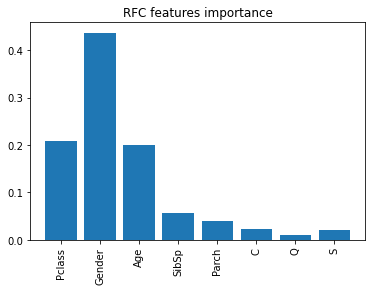

In [106]:
impact = RFC.feature_importances_
values = X_train.columns.values

plt.figure()
plt.title('RFC features importance')
plt.bar(range(X_train.shape[1]), impact) # bar is because it is of good use for categoric data
plt.xticks(range(X_train.shape[1]), values, rotation = 90);
# plt.show(); this is not necessery 

In [107]:
GBC = GradientBoostingClassifier()
GBC.fit(X_train, y_train)
GBC.score(X_train, y_train), GBC.score(X_test, y_test) 

(0.8707865168539326, 0.8603351955307262)

In [108]:
GBC.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'presort': 'deprecated',
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [133]:
estimators = [25, 50, 100, 200, 300, 500]
max_depth = [3, 7, 12, 18, 30, 40, 60, 100]
min_samples_leaf = [1, 2, 4, 6]
min_samples_split = [2, 5, 7, 9, 11]
learning_rate = [0.1, 0.2, 0.4, 0.6]
K_fold = 7

params_table = {'n_estimators': estimators,
              'max_depth': max_depth,
              'min_samples_leaf': min_samples_leaf,
              'min_samples_split': min_samples_split,
               'learning_rate': learning_rate}

RS = RandomizedSearchCV(estimator = GBC,
                        param_distributions = params_table,
                        n_iter = 100,
                        cv = 7,
                        n_jobs = -1)

In [134]:
%%time
RS.fit(X_train, y_train)
RS.best_params_

Wall time: 9min 23s


{'n_estimators': 50,
 'min_samples_split': 11,
 'min_samples_leaf': 2,
 'max_depth': 3,
 'learning_rate': 0.2}

In [109]:
GBC = GradientBoostingClassifier(n_estimators = 50,
                                 min_samples_split = 11,
                                 min_samples_leaf = 2,
                                 max_depth = 3,
                                learning_rate = 0.2)
GBC.fit(X_train, y_train)
GBC.score(X_train, y_train), GBC.score(X_test, y_test)

(0.8679775280898876, 0.8715083798882681)

In [110]:
GBC.feature_importances_

array([0.19306858, 0.48184849, 0.1862355 , 0.0781599 , 0.02532903,
       0.00499102, 0.01478337, 0.01558411])

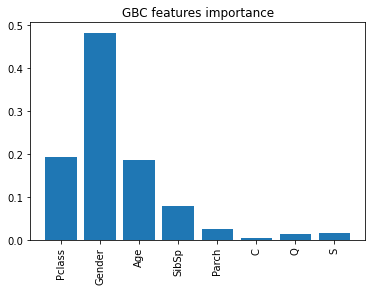

In [111]:
impact = GBC.feature_importances_
values = X_train.columns.values

plt.figure()
plt.title('GBC features importance')
plt.bar(range(X_train.shape[1]), impact) # bar is because it is of good use for categoric data
plt.xticks(range(X_train.shape[1]), values, rotation = 90);
# plt.show(); this is not necessery 

In [112]:
print(Log_Reg)
print(Tree)
print(RFC)
print(GBC)

LogisticRegression()
DecisionTreeClassifier(max_depth=7)
RandomForestClassifier(max_depth=100, min_samples_leaf=6, min_samples_split=11,
                       n_estimators=50)
GradientBoostingClassifier(learning_rate=0.2, min_samples_leaf=2,
                           min_samples_split=11, n_estimators=50)


In [113]:
Log_Reg.fit(X, y)
Log_Reg.score(X, y)

C:\Users\python\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8024691358024691

In [114]:
Tree.fit(X, y)
Tree.score(X, y)

0.8664421997755332

In [115]:
RFC.fit(X, y)
RFC.score(X, y)

0.8439955106621774

In [116]:
GBC.fit(X, y)
GBC.score(X, y)

0.8742985409652076

### Log_Reg = 0.80
### Tree = 0.86
### RFC = 084
### GBC = 087

### Test predict

In [117]:
df_test = pd.read_csv('../Dataset/test.csv', sep = ',') # in this dataframe I don't have 
# real 'y'
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [118]:
df_test.shape

(418, 11)

In [119]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [120]:
lst_columns_test = df_test.columns.values.tolist()

c = 0
for i in lst_columns_test:
    isnull = df_test[i].isnull().sum()
    if isnull !=0:
        c += 1
        print(f'{c}. Isnull values in {i} is {isnull}')

1. Isnull values in Age is 86
2. Isnull values in Fare is 1
3. Isnull values in Cabin is 327


In [121]:
ID = df_test['PassengerId']

df_test['Age'] = df_test['Age'].fillna(value = df_test['Age'].mean())

df_test = pd.concat([df_test, pd.get_dummies(df_test['Embarked'])], axis = 1)

df_test['Sex'] = df_test['Sex'].map({'male': 0, 'female': 1})

df_test = df_test.drop(columns = ['PassengerId','Name', 'Ticket','Fare','Cabin', 'Embarked'])

df_test.head()

,Pclass,Sex,Age,SibSp,Parch,C,Q,S
0,3,0,34.5,0,0,0,1,0
1,3,1,47.0,1,0,0,0,1
2,2,0,62.0,0,0,0,1,0
3,3,0,27.0,0,0,0,0,1
4,3,1,22.0,1,1,0,0,1


In [122]:
df_test.shape

(418, 8)

In [124]:
GBC

GradientBoostingClassifier(learning_rate=0.2, min_samples_leaf=2,
                           min_samples_split=11, n_estimators=50)

In [125]:
GBC_predict = GBC.predict(df_test)

In [127]:
GBC_final = pd.DataFrame({'PassengerId': ID,
                       'Survived': GBC_predict})
GBC_final.to_csv('Mirbek_GBC_Predict.csv', index = False)

In [128]:
RFC

RandomForestClassifier(max_depth=100, min_samples_leaf=6, min_samples_split=11,
                       n_estimators=50)

In [130]:
RFC_predict = RFC.predict(df_test)

In [131]:
RFC_final = pd.DataFrame({'PassengerId': ID,
                       'Survived': RFC_predict})
RFC_final.to_csv('Mirbek_RFC_Predict.csv', index = False)